In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN


## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(#2EA149, #1e3a8a, #4f46e5); text-align: right;"> خوشه بندی </div>


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [2]:
data = pd.read_csv('df_clustering.csv')
data


,Address,year,income,cost
0,11505188611,1398,2.000000e+08,5.721200e+07
1,11505188614,1398,3.725900e+08,1.351200e+08
2,11505188617,1398,2.060000e+09,1.500800e+08
3,11505188620,1398,6.460000e+08,2.178820e+08
4,11505188623,1398,4.275000e+08,1.252000e+08
...,...,...,...,...
151819,23006709526,1401,8.932000e+08,3.995280e+08
151820,10001000141,1401,1.869600e+10,5.218300e+08
151821,10001000126,1401,5.326000e+09,1.218760e+09
151822,10001000132,1401,2.657100e+09,1.637200e+08


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی دیتا </div>


In [3]:
data.describe()


,Address,year,income,cost
count,1.518240e+05,151824.000000,1.320420e+05,1.518240e+05
mean,1.634017e+10,1399.497695,9.838739e+08,2.172342e+08
std,5.038920e+09,1.120195,3.421226e+09,7.372693e+08
min,1.000100e+10,1398.000000,0.000000e+00,5.000000e+05
25%,1.150319e+10,1398.000000,2.169000e+08,4.053000e+07
50%,1.290736e+10,1400.000000,4.386000e+08,9.470478e+07
75%,2.130954e+10,1400.000000,9.526375e+08,2.128978e+08
max,2.300671e+10,1401.000000,5.405600e+11,8.139810e+10


In [4]:
data.isnull().sum()


Address        0
year           0
income     19782
cost           0
dtype: int64

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> پر کردن مقادیر گمشده ستون درآمد </div>


In [5]:
imputer = KNNImputer(n_neighbors=5)
data[['income']] = imputer.fit_transform(data[['income']])

# Checking again for missing values
data.isnull().sum()


Address    0
year       0
income     0
cost       0
dtype: int64

In [6]:
data


,Address,year,income,cost
0,11505188611,1398,2.000000e+08,5.721200e+07
1,11505188614,1398,3.725900e+08,1.351200e+08
2,11505188617,1398,2.060000e+09,1.500800e+08
3,11505188620,1398,6.460000e+08,2.178820e+08
4,11505188623,1398,4.275000e+08,1.252000e+08
...,...,...,...,...
151819,23006709526,1401,8.932000e+08,3.995280e+08
151820,10001000141,1401,1.869600e+10,5.218300e+08
151821,10001000126,1401,5.326000e+09,1.218760e+09
151822,10001000132,1401,2.657100e+09,1.637200e+08


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> مقیاس بندی داده ها </div>


- <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بدلیل تفاوت زیاد بین ستون های هزینه و درآمد مقیاس بندی انجام می دهیم </div>


In [7]:
scaler = MinMaxScaler()
data[['income', 'cost']] = scaler.fit_transform(data[['income', 'cost']])
data.head()


,Address,year,income,cost
0,11505188611,1398,0.000370,0.000697
1,11505188614,1398,0.000689,0.001654
2,11505188617,1398,0.003811,0.001838
3,11505188620,1398,0.001195,0.002671
4,11505188623,1398,0.000791,0.001532


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> اجرای خوشه بندی </div>


In [8]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
data['cluster'] = kmeans.fit_predict(data[['income', 'cost']])
data


,Address,year,income,cost,cluster
0,11505188611,1398,0.000370,0.000697,0
1,11505188614,1398,0.000689,0.001654,0
2,11505188617,1398,0.003811,0.001838,0
3,11505188620,1398,0.001195,0.002671,0
4,11505188623,1398,0.000791,0.001532,0
...,...,...,...,...,...
151819,23006709526,1401,0.001652,0.004902,4
151820,10001000141,1401,0.034586,0.006405,7
151821,10001000126,1401,0.009853,0.014967,4
151822,10001000132,1401,0.004915,0.002005,0


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> گروه بندی خوشه ها بر اساس میانگین درآمد و هزینه </div>


In [9]:
cluster_means = data.groupby('cluster')[['income', 'cost']].mean()
cluster_means


,income,cost
cluster,,
0,0.001079,0.001176
1,0.014722,0.421708
2,0.004771,0.078578
3,0.121049,0.010883
4,0.003801,0.006204
5,0.828345,0.008457
6,0.005851,0.192262
7,0.030025,0.005720
8,0.305032,0.021430


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> نام گذاری خوشه ها برای درک بهتر نمودار نهایی </div>


In [10]:
# Creating a labeling function based on cluster means
def label_cluster(row):
    if row['cluster'] == 0:
        return 'Very Low Income, Very Low Cost'
    elif row['cluster'] == 1:
        return 'Low Income, Medium Cost'
    elif row['cluster'] == 2:
        return 'Low Income, Low Cost'
    elif row['cluster'] == 3:
        return 'Medium Income, Very Low Cost'
    elif row['cluster'] == 4:
        return 'Very Low Income, Very Low Cost'
    elif row['cluster'] == 5:
        return 'Very High Income, Low Cost'
    elif row['cluster'] == 6:
        return 'Low Income, Relatively Low Cost'
    elif row['cluster'] == 7:
        return 'Relatively Low Income, Very Low Cost'
    elif row['cluster'] == 8:
        return 'Medium Income, Low Cost'
    elif row['cluster'] == 9:
        return 'Low Income, Relatively Low Cost'



### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> ایجاد برچسب ها و مشخص کردن مراکز </div>


In [11]:
data['cluster_label'] = data.apply(label_cluster, axis=1)
centers = kmeans.cluster_centers_
data


,Address,year,income,cost,cluster,cluster_label
0,11505188611,1398,0.000370,0.000697,0,"Very Low Income, Very Low Cost"
1,11505188614,1398,0.000689,0.001654,0,"Very Low Income, Very Low Cost"
2,11505188617,1398,0.003811,0.001838,0,"Very Low Income, Very Low Cost"
3,11505188620,1398,0.001195,0.002671,0,"Very Low Income, Very Low Cost"
4,11505188623,1398,0.000791,0.001532,0,"Very Low Income, Very Low Cost"
...,...,...,...,...,...,...
151819,23006709526,1401,0.001652,0.004902,4,"Very Low Income, Very Low Cost"
151820,10001000141,1401,0.034586,0.006405,7,"Relatively Low Income, Very Low Cost"
151821,10001000126,1401,0.009853,0.014967,4,"Very Low Income, Very Low Cost"
151822,10001000132,1401,0.004915,0.002005,0,"Very Low Income, Very Low Cost"


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار </div>


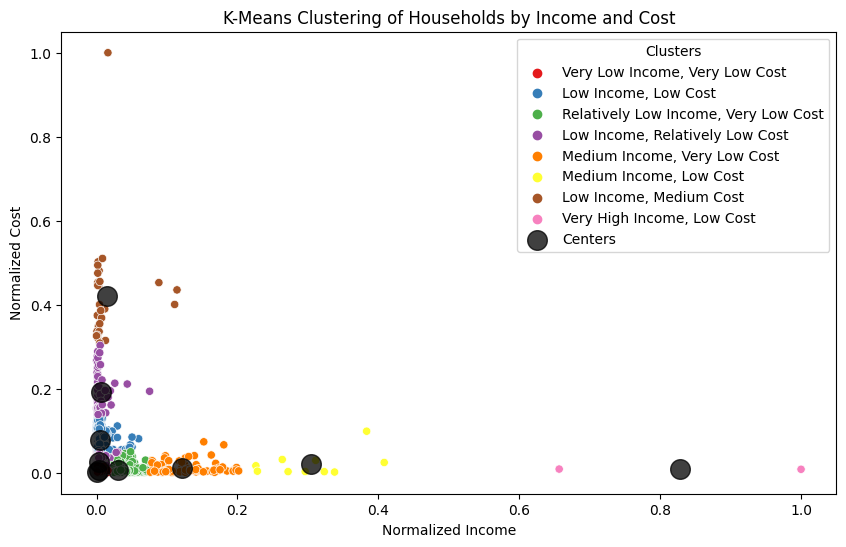

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['income'], y=data['cost'], hue=data['cluster_label'], palette='Set1', legend='full')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, label='Centers')
plt.title('K-Means Clustering of Households by Income and Cost')
plt.xlabel('Normalized Income')
plt.ylabel('Normalized Cost')
plt.legend(title='Clusters')
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بدست آوردن تعداد موجود از هر برچسب برای رسم نمودار با جزئیات بیشتر </div>


In [13]:
cluster_sizes = data['cluster'].value_counts().to_dict()
cluster_sizes


{0: 125308,
 4: 22847,
 9: 2244,
 7: 896,
 2: 328,
 3: 94,
 6: 66,
 1: 29,
 8: 10,
 5: 2}

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار با جزئیات بیشتر </div>


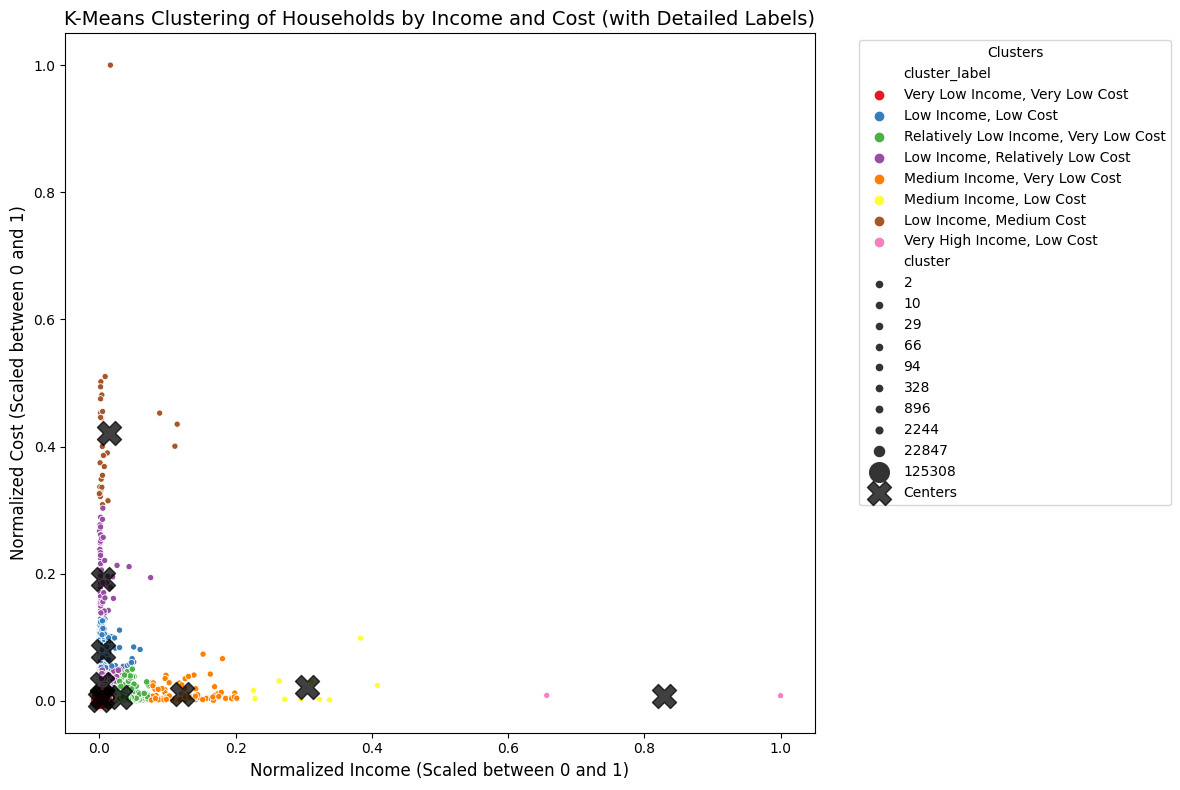

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['income'], y=data['cost'], hue=data['cluster_label'], palette='Set1', 
                size=data['cluster'].map(cluster_sizes), sizes=(20, 200), legend='full')
# Marking cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.75, label='Centers', marker='X')
# Adding titles and labels
plt.title('K-Means Clustering of Households by Income and Cost (with Detailed Labels)', fontsize=14)
plt.xlabel('Normalized Income (Scaled between 0 and 1)', fontsize=12)
plt.ylabel('Normalized Cost (Scaled between 0 and 1)', fontsize=12)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
# Display the plot
plt.tight_layout()
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> مشخص کردن مقدار کلاستر ها </div>


In [15]:
wcss = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(data[['income', 'cost']])
    wcss.append(kmeans.inertia_) 


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> رسم نمودار </div>


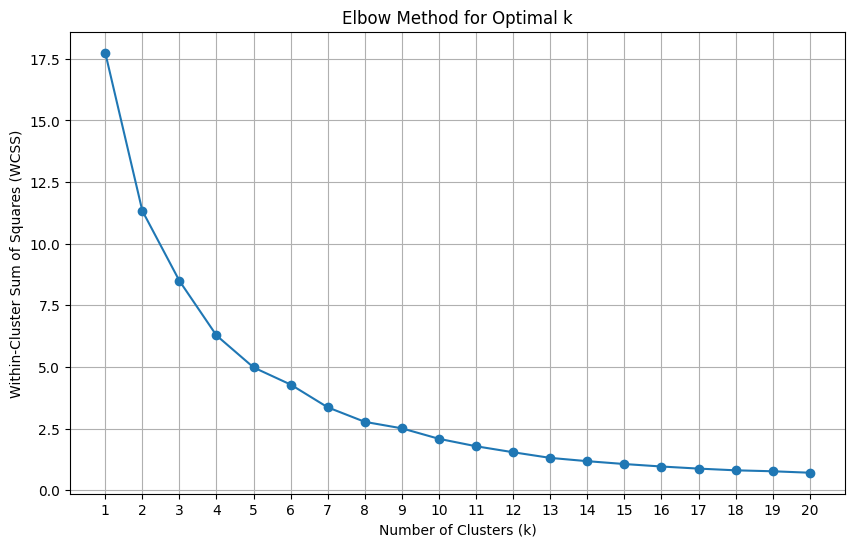

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show() 


In [8]:
data


,Address,year,income,cost
0,11505188611,1398,0.000370,0.000697
1,11505188614,1398,0.000689,0.001654
2,11505188617,1398,0.003811,0.001838
3,11505188620,1398,0.001195,0.002671
4,11505188623,1398,0.000791,0.001532
...,...,...,...,...
151819,23006709526,1401,0.001652,0.004902
151820,10001000141,1401,0.034586,0.006405
151821,10001000126,1401,0.009853,0.014967
151822,10001000132,1401,0.004915,0.002005


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی تعداد آدرس های منحصر به فرد </div>


In [9]:
data['Address'].nunique()


96198

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> گروه بندی و کاهش سطر ها </div>


In [10]:
grouped = data.groupby('Address')
grouped_summary = grouped[['income', 'cost']].sum()
grouped_summary


,income,cost
Address,,
10001000108,0.000725,0.001864
10001000111,0.001110,0.002428
10001000113,0.001643,0.002991
10001000114,0.000266,0.000527
10001000116,0.001210,0.003862
...,...,...
23006709829,0.000761,0.000562
23006709832,0.005617,0.008183
23006709835,0.002487,0.035469


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> بررسی داده های پرت </div>


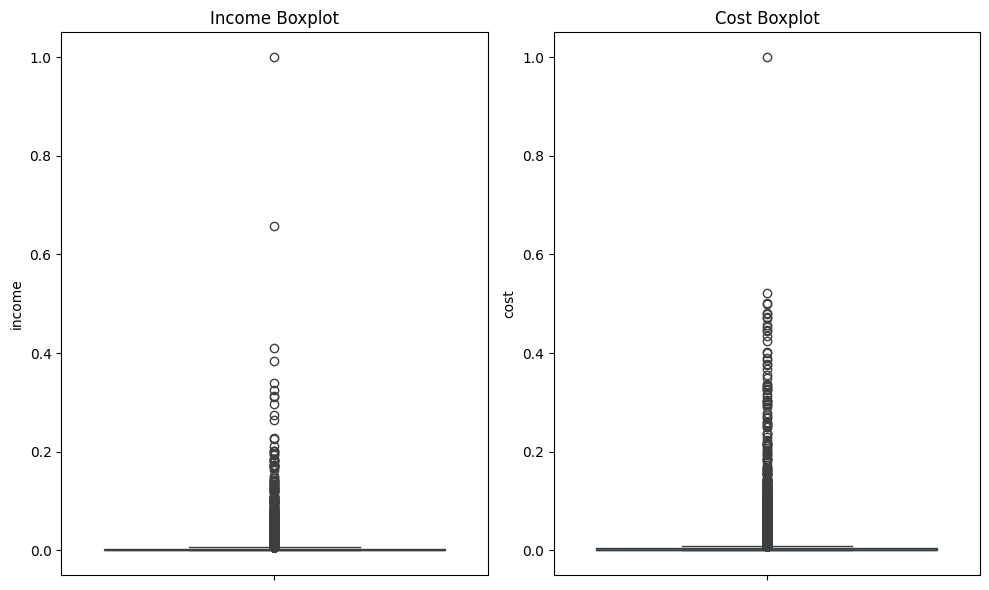

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=grouped_summary['income'])
plt.title('Income Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(y=grouped_summary['cost'])
plt.title('Cost Boxplot')

plt.tight_layout()
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;">مقیاس بندی داده ها </div>


In [14]:
X = grouped_summary[['income', 'cost']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.27937866, -0.19436875],
       [-0.22931744, -0.14745551],
       [-0.1600019 , -0.10066538],
       ...,
       [-0.05012473,  2.59854904],
       [-0.30135265, -0.17152949],
       [-0.19497255,  0.88529399]])

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> اجرای DBScan و ایجاد 10 کلاستر با معنا </div>


Estimated number of clusters: 9
Number of noise points: 160


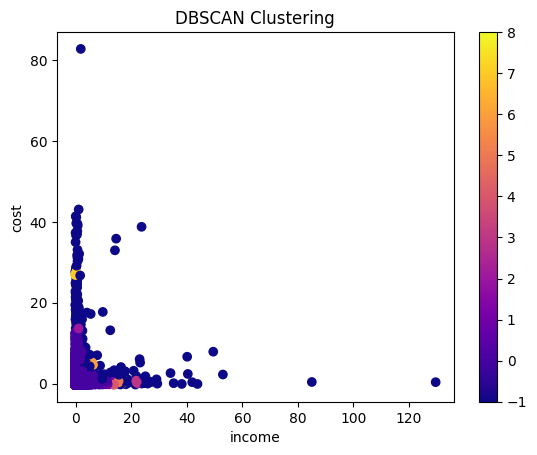

In [27]:
dbscan = DBSCAN(eps=0.55, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

grouped_summary['dbscan_cluster'] = dbscan_labels

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='plasma')
plt.xlabel('income')
plt.ylabel('cost')
plt.title('DBSCAN Clustering')
plt.colorbar()
plt.show()


In [28]:
grouped_summary.dbscan_cluster.nunique()

10